In [3]:
from image_data_quality.image_dataset import Imagelab
from PIL import Image
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image, display

In [4]:
def display_results(files):
    for i, f in enumerate(files):
        display(Image(os.path.join(dataset_path,f)))

In [5]:
pd.set_option('display.max_rows', 20)

In [6]:
dataset_path = "../image_files/"

In [7]:
imagelab = Imagelab(dataset_path, thumbnail_size=(128, 128))
print(f"Number of images: {str(len(imagelab.image_files))}")

Number of images: 517


In [8]:
issue_name = "Blurred"

In [9]:
issues = imagelab.evaluate()
imagelab.aggregate()
summary, results_df = imagelab.summary()

Checking for NearDuplicates, DarkImages, Entropy, Blurred, Duplicated, LightImages, AspectRatio, Grayscale


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 517/517 [00:05<00:00, 96.85it/s]

Color spaces in the  dataset
{'L': 12, 'RGB': 505}

Issue Summary
                Issues  Percent of Data  Issue Intensity
DarkImages          27             5.22         0.360000
Blurred             12             2.32         0.160000
Grayscale           12             2.32         0.160000
NearDuplicates       9             1.74         0.120000
Duplicated           7             1.35         0.093333
LightImages          4             0.77         0.053333
AspectRatio          3             0.58         0.040000
Entropy              1             0.19         0.013333



# Dark Images

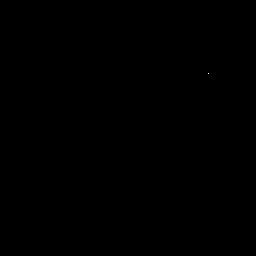

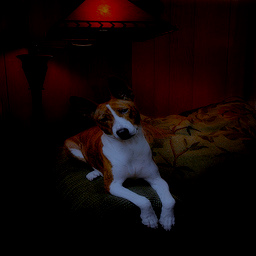

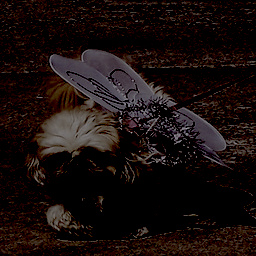

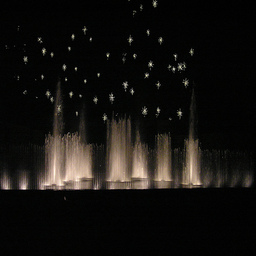

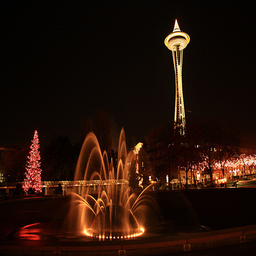

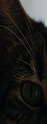

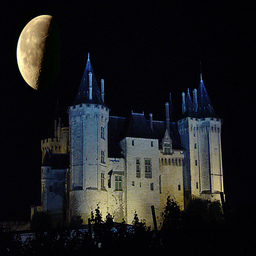

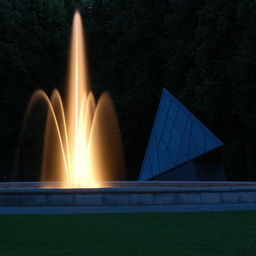

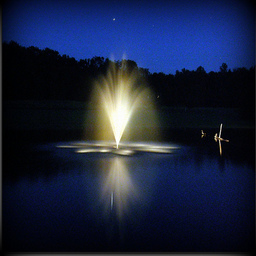

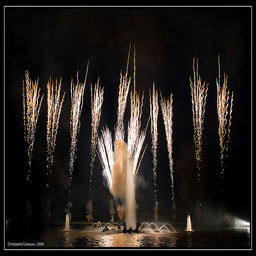

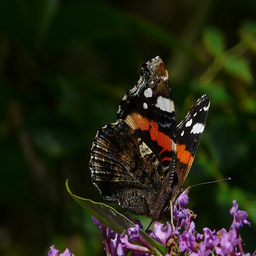

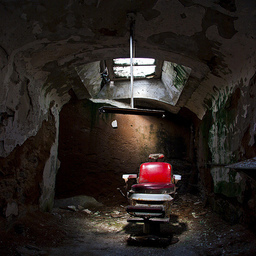

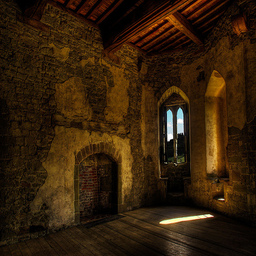

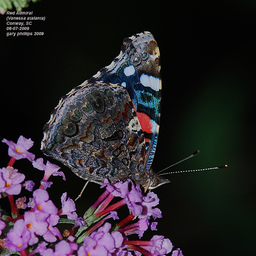

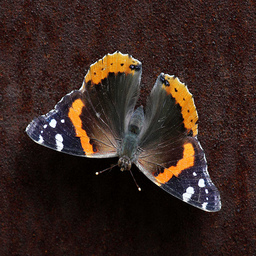

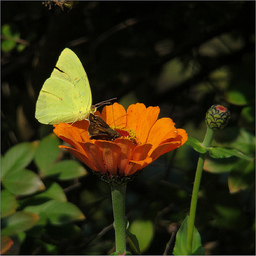

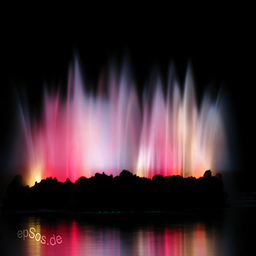

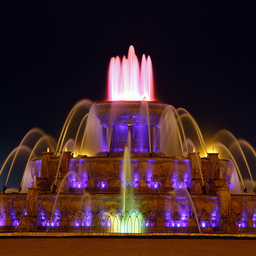

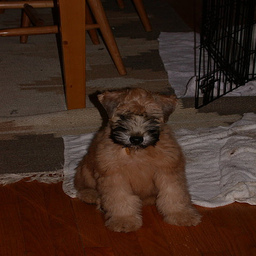

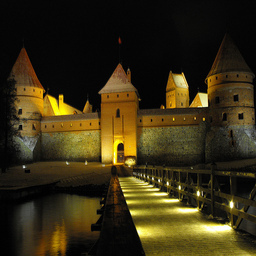

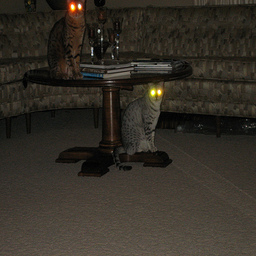

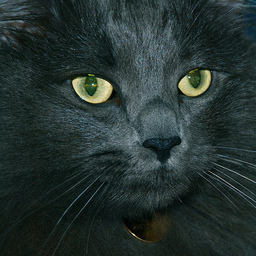

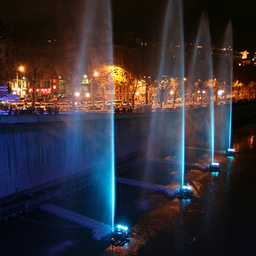

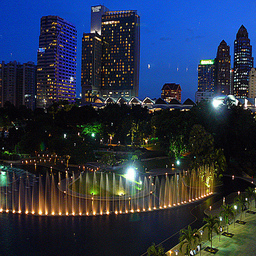

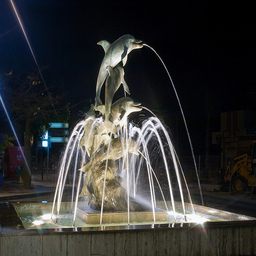

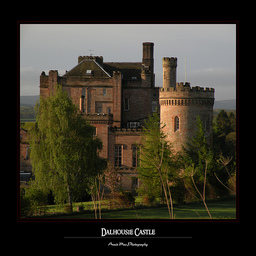

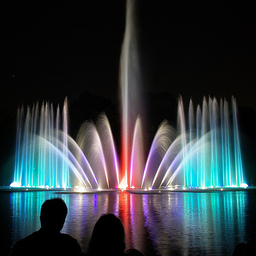

In [10]:
sorted_df = results_df.sort_values(by=[f'DarkImages score'])
files =list(sorted_df[sorted_df[f'DarkImages bool'] == True]['image_name'])
display_results(files)

## Grayscale Images

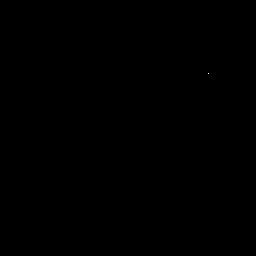

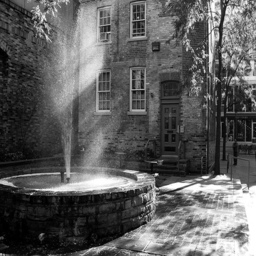

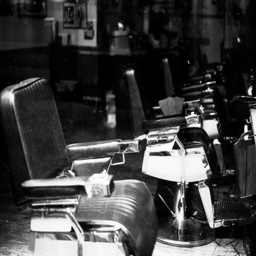

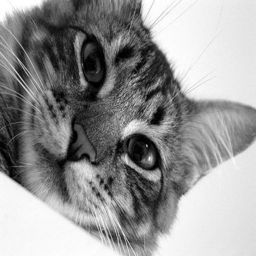

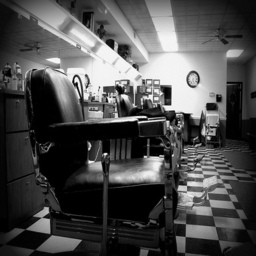

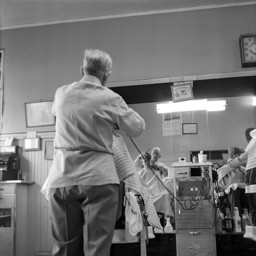

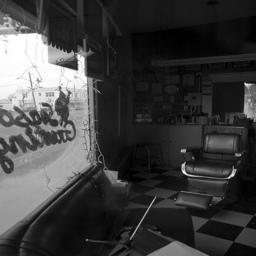

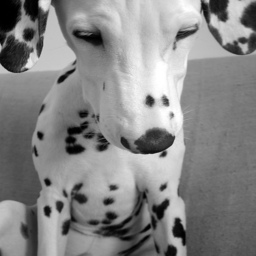

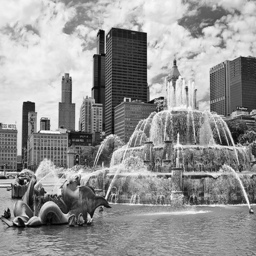

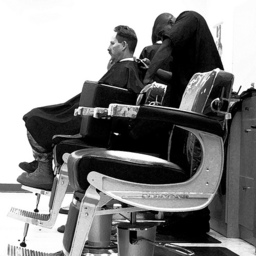

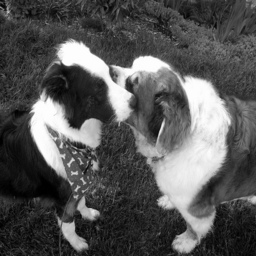

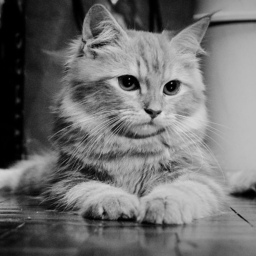

In [11]:
sorted_df = results_df.sort_values(by=[f'Grayscale score'])
files =list(sorted_df[sorted_df[f'Grayscale bool'] == True]['image_name'])
display_results(files)

## Blurred images

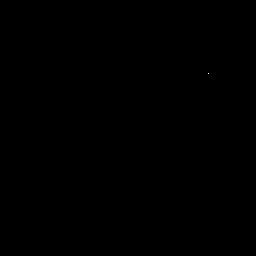

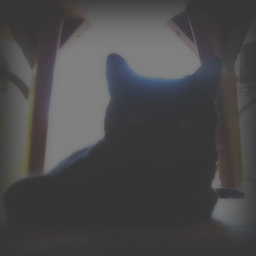

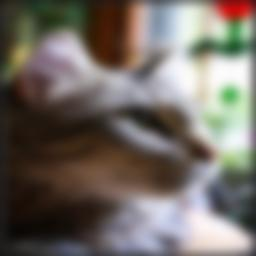

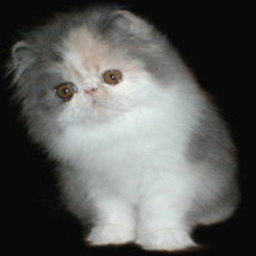

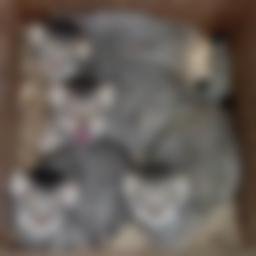

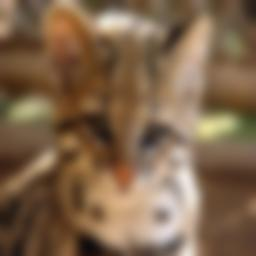

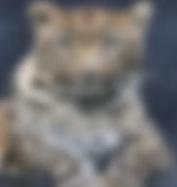

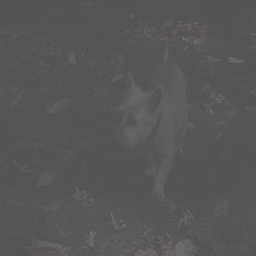

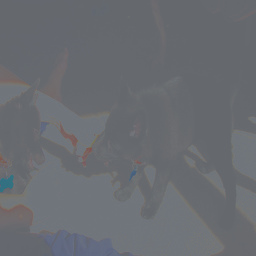

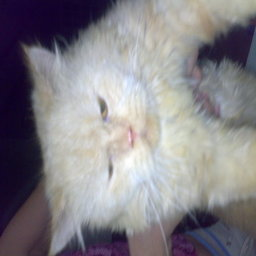

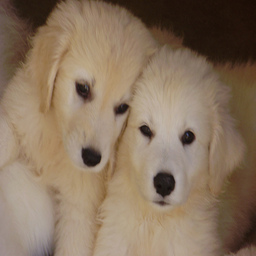

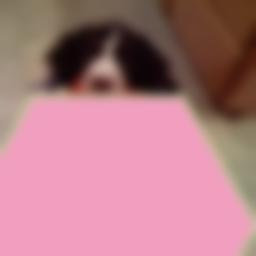

In [12]:
sorted_df = results_df.sort_values(by=[f'Blurred score'])
files =list(sorted_df[sorted_df[f'Blurred bool'] == True]['image_name'])
display_results(files)

## Extreme aspect ratio

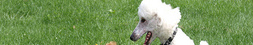

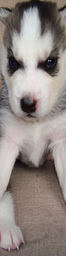

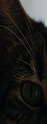

In [13]:
sorted_df = results_df.sort_values(by=[f'AspectRatio score'])
files =list(sorted_df[sorted_df[f'AspectRatio bool'] == True]['image_name'])
display_results(files)

## Light Images

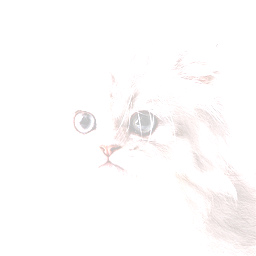

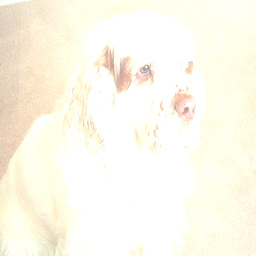

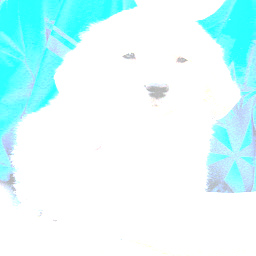

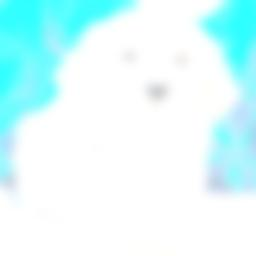

In [14]:
sorted_df = results_df.sort_values(by=[f'LightImages score'])
files =list(sorted_df[sorted_df[f'LightImages bool'] == True]['image_name'])
display_results(files)

## Low Entropy

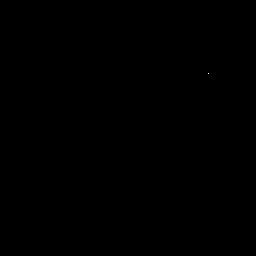

In [15]:
sorted_df = results_df.sort_values(by=[f'Entropy score'])
files =list(sorted_df[sorted_df[f'Entropy bool'] == True]['image_name'])
display_results(files)

## Near Duplicates

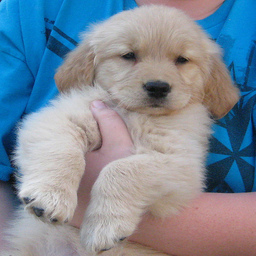

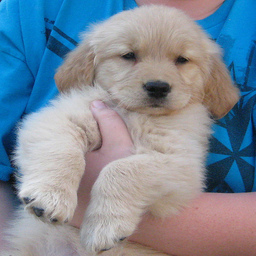

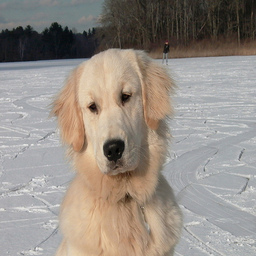

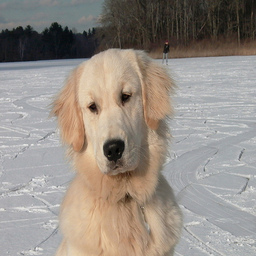

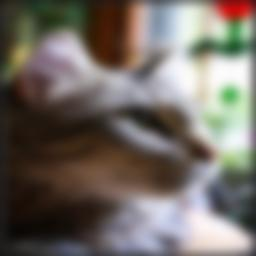

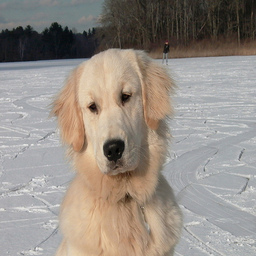

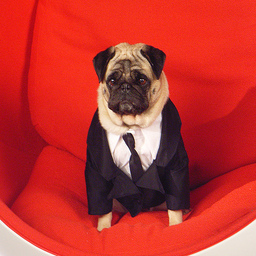

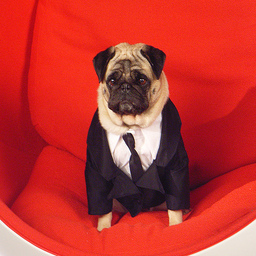

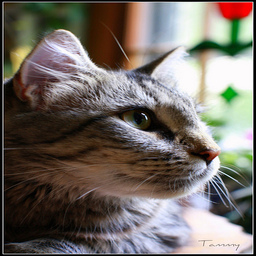

In [17]:
sorted_df = results_df.sort_values(by=[f'NearDuplicates score'])
files =list(sorted_df[sorted_df[f'NearDuplicates bool'] == True]['image_name'])
display_results(files)

In [24]:
for manager in imagelab.issue_managers:
    if manager.issue_name == 'NearDuplicates':
        duplicate_sets = manager.get_duplicated_sets()

In [25]:
duplicate_sets

[['blur.JPEG', 'ILSVRC2012_val_00027189.JPEG'],
 ['ILSVRC2012_val_00013278.JPEG', 'ILSVRC2012_val_00013278 copy.JPEG'],
 ['ILSVRC2012_val_00005068.JPEG', 'ILSVRC2012_val_00005068 copy.JPEG'],
 ['ILSVRC2012_val_00001112.JPEG',
  'ILSVRC2012_val_00001112 copy.JPEG',
  'ILSVRC2012_val_00001112 copy 2.JPEG']]

0


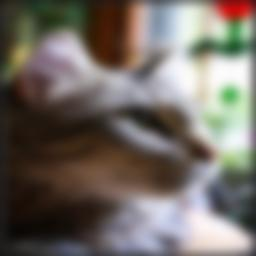

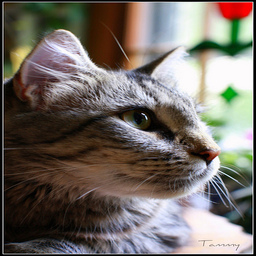

1


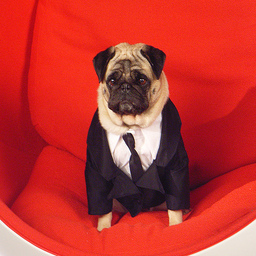

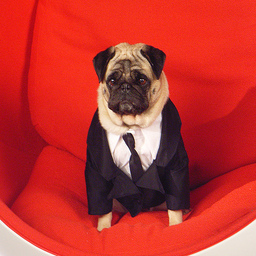

2


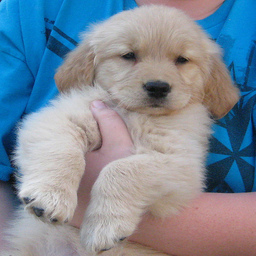

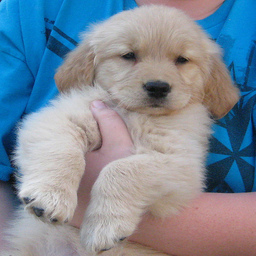

3


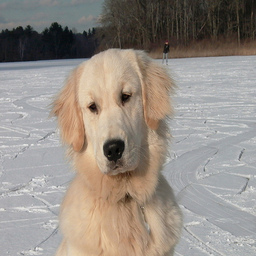

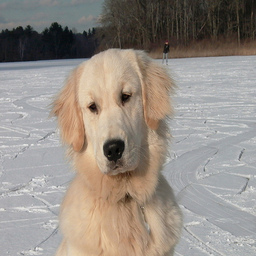

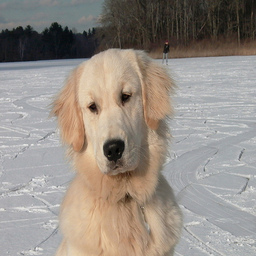

In [28]:
for i, s in enumerate(duplicate_sets):
    print(i)
    display_results(s)